## Intro : As part of Shai for ai machine learning engineering internship .... adjust it --- kaggle competition

https://www.kaggle.com/competitions/diamond-price-prediciton-2024/overview

Description
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond color, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of the top of diamond relative to widest point (43--95)

Evaluation
Evaluation Metric The evaluation metric for this competition is Root Mean Squared Error (RMSE). The RMSE is a commonly used measure of the differences between predicted values provided by a model and the actual observed values. Submission Format For every diamond (i.e. row) in the test dataset (test.csv), submission files should contain two columns: id and price. id should be an integer and price should be a real value. For each row, these two values should be separated by a comma. The file should contain a header and have the following format ``` Id,price 597,2838 ```

In [114]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
prices = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [116]:
print(f"{len(prices)} prices")

43152 prices


In [117]:
prices.head() 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [118]:
prices.info() # all datatypes seem to be matching

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [119]:
prices.describe() # There are x,y, and z valeus of zeros does that make sense?, should they be imputated?

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [120]:
prices.isna().any() # no null value

Id         False
carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

no null values but there are dimensions (x,y, and z) with values of zero which is physically impossible

a basic imputator could be used or manually filling them in with the median value

In [121]:
prices.duplicated().sum() # 97 duplicates

0

In [122]:
prices.drop_duplicates() 

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [123]:
prices.carat.value_counts()

carat
0.30    2084
1.01    1806
0.31    1767
0.70    1589
0.32    1506
        ... 
3.65       1
4.00       1
2.67       1
3.04       1
3.40       1
Name: count, Length: 266, dtype: int64

In [124]:
prices[(prices['x'] == 0) | (prices['y'] == 0) | (prices['z'] == 0)]


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
571,572,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
903,904,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
1221,1222,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
4980,4981,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
6765,6766,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
11221,11222,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
13727,13728,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
14265,14266,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
16971,16972,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21061,21062,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0


In [125]:
zeros_count = {
    'x_zeros': (prices['x'] == 0).sum(),
    'y_zeros': (prices['y'] == 0).sum(),
    'z_zeros': (prices['z'] == 0).sum()
}
zeros_count

{'x_zeros': 5, 'y_zeros': 4, 'z_zeros': 17}

In [126]:
# Imputation ??
# Dropping the rows that have zero dimensions all around and then imputing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")

prices = prices[~((prices.x == 0)&(prices.y == 0)&(prices.z == 0))] # Selecting all rows that do have at least one dimension enterned
# The imputer deals with "nan" so zeros --> nan
prices['x'].replace(0, np.nan, inplace=True)
prices['y'].replace(0, np.nan, inplace=True)
prices['z'].replace(0, np.nan, inplace=True)

prices[['x', 'y', 'z']] = imputer.fit_transform(prices[['x', 'y', 'z']])

# To stay consistent the same imputer object that was fit to the dimensions of the train set (prices) will be used on the test set
test_set[['x', 'y', 'z']] = imputer.transform(test_set[['x', 'y', 'z']])

In [127]:
print(f"New length of observations: {len(prices)} prices")
print(f"{len(prices[(prices['x'] == 0) | (prices['y'] == 0) | (prices['z'] == 0)])} diamonds with no dimensions at all")

New length of observations: 43148 prices
0 diamonds with no dimensions at all


In [128]:
prices = prices.drop('Id',axis=1) # No need for the Id here
prices_num = prices.select_dtypes(include=['int64', 'float64']).columns

<Figure size 1000x1000 with 0 Axes>

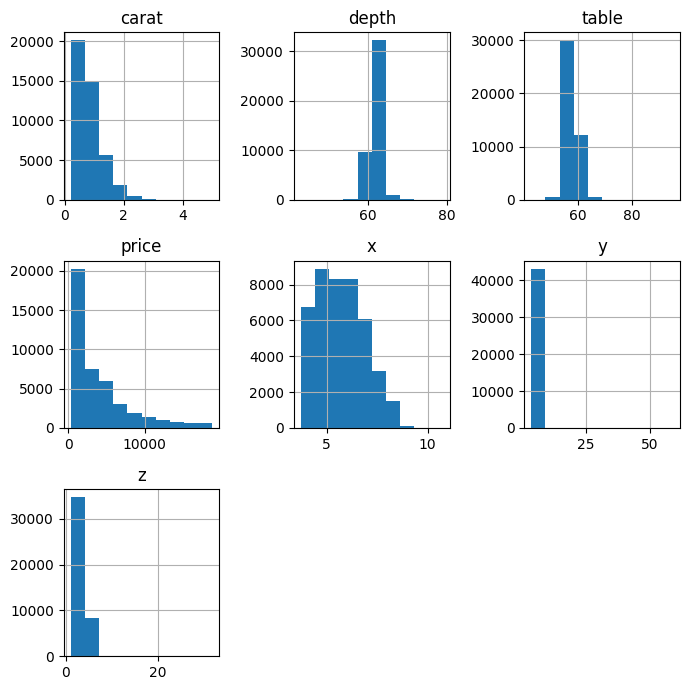

<Figure size 640x480 with 0 Axes>

In [129]:
# checking the distributions
plt.figure(figsize=(10, 10))
prices[prices_num].hist(figsize=(7,7))
plt.tight_layout()
plt.show()
plt.clf()

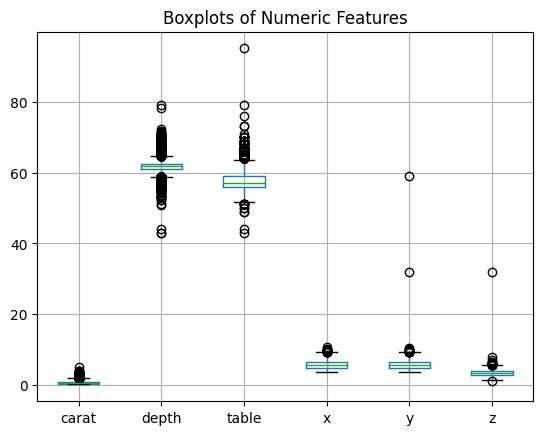

<Figure size 640x480 with 0 Axes>

In [130]:
#Checking outliers
exclude_columns = ['price']
include_columns = [col for col in prices_num if col not in exclude_columns ]
prices[include_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

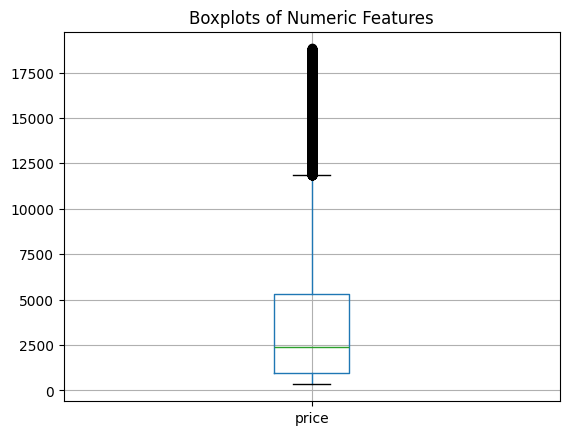

<Figure size 640x480 with 0 Axes>

In [131]:
prices[exclude_columns].boxplot()
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

#### EDA 
#### corr and scatter plots
#### corr after attr combination?
#### Box plots for categorical variables to see how prices differ
#### OrdinalEncoder (Both the train set and test set)
#### scaling

In [132]:
p_copy = prices.copy()
correlation = p_copy[prices_num].corr()
correlation["price"].sort_values(ascending=False)

price    1.000000
carat    0.921894
x        0.887165
z        0.864340
y        0.862947
table    0.128465
depth   -0.013149
Name: price, dtype: float64

# explain

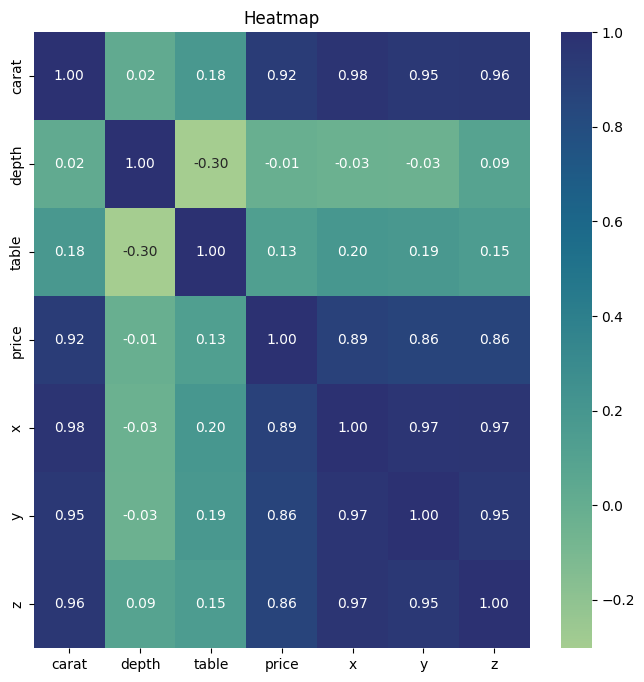

In [133]:
# how do numeric variables correlate to each  other
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap')
plt.show()

In [134]:
# # trying a new attribute called size x*y*z
p_copy["size"] = p_copy["x"] * p_copy["y"] * p_copy["z"] 
correlation_n = p_copy[p_copy.select_dtypes(include=['int64', 'float64']).columns].corr()
correlation_n["price"].sort_values(ascending=False)


price    1.000000
carat    0.921894
size     0.899708
x        0.887165
z        0.864340
y        0.862947
table    0.128465
depth   -0.013149
Name: price, dtype: float64

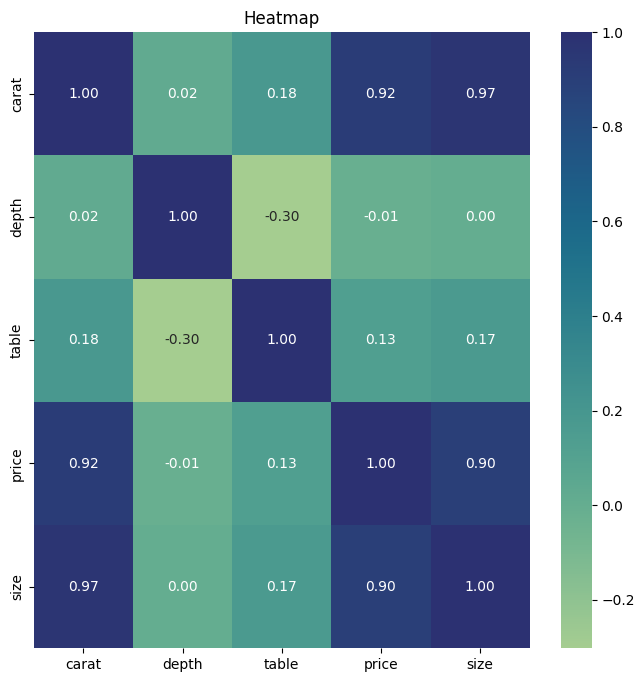

In [135]:
corr = p_copy[['carat', 'depth', 'table', 'price', 'size']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
plt.title('Heatmap')
plt.show()

### From both heatmaps we could see the high correlation between carat,x,y,and z and the price in heatmap1/ carat,size and the price in heatmap2
### Having many higly correlated values could affect model like Linear regression, while not affecting tree based model that much.

### Suggestion: Seeing scores with both sets (1 -> x,y,z and no size variable) (2-> size variable and no x,y, and z)

-------------------------------------------------
#### A pair plot will showcase distributions for individual variables and scatterplots for numeric variables as well.
>  Notice the upward trend refelcting the high correlation factor (pearson) between x,y,z,size and price, which is contrary to table and depth with very low correlation factor

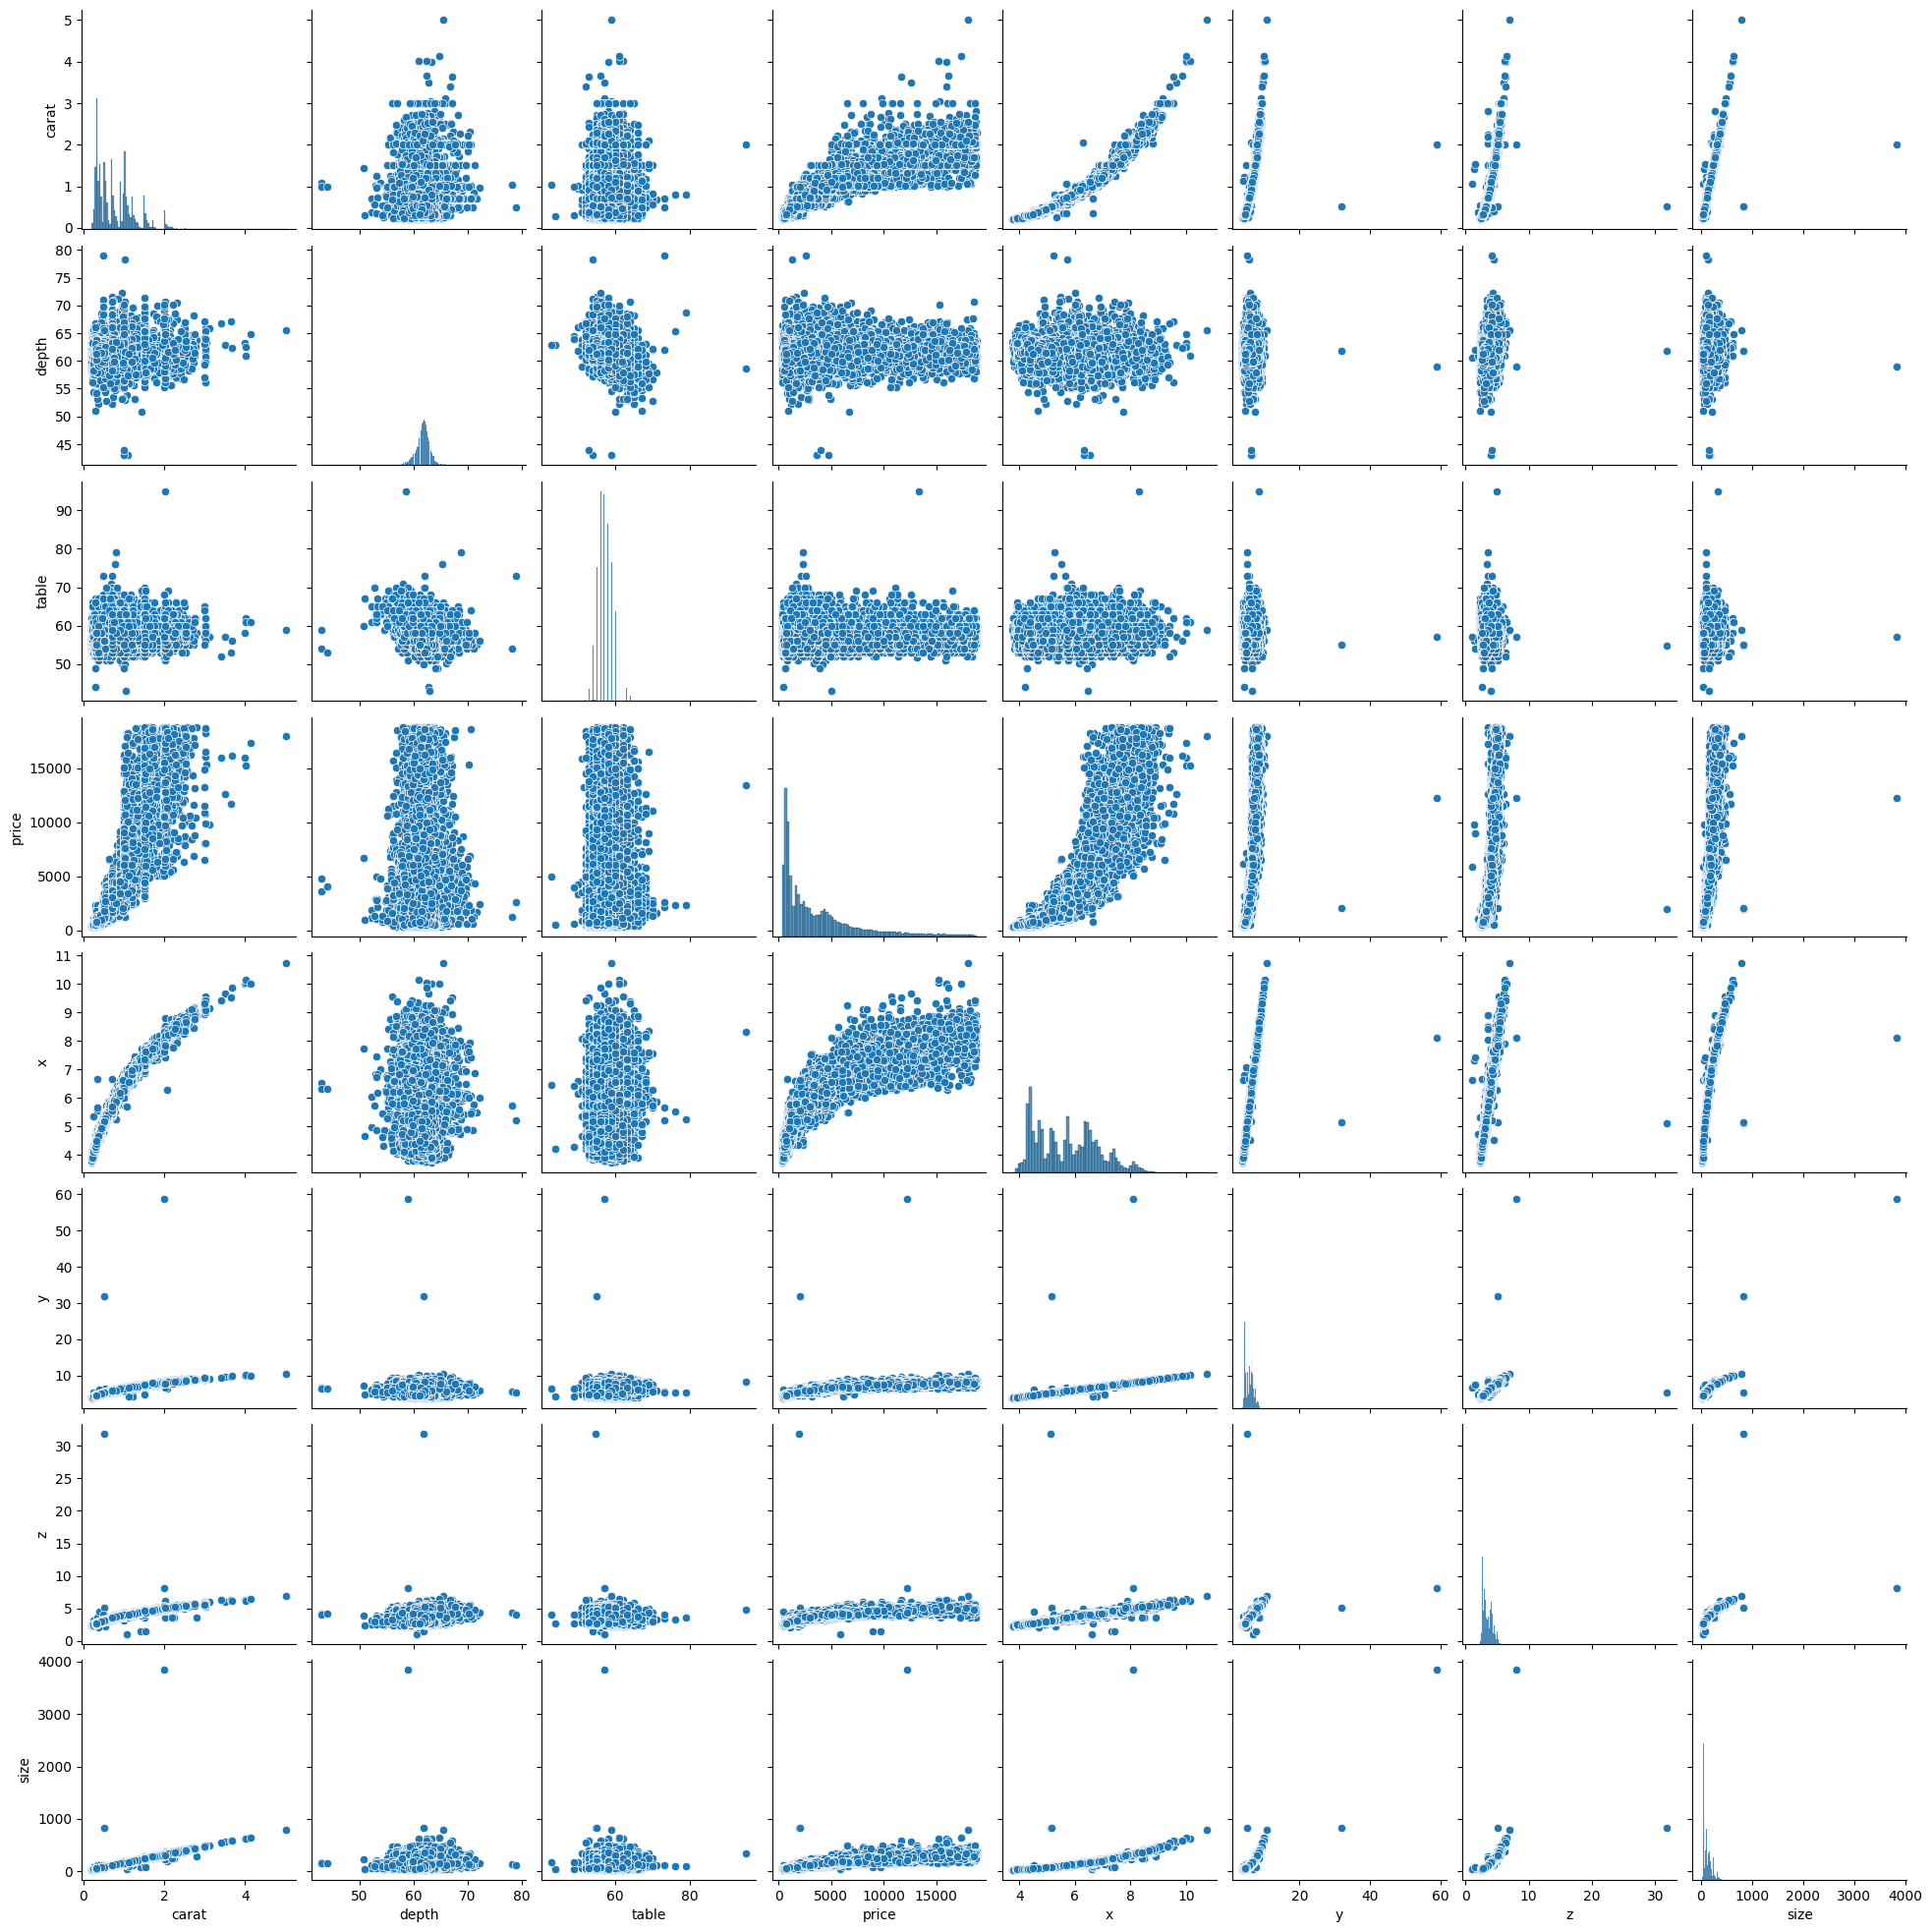

<Figure size 640x480 with 0 Axes>

In [136]:
# Pairplot can be usefull for inspection
sns.pairplot(p_copy)
plt.show()
plt.clf()

--------------------
#### For building an intuition for categorical variables seeing how price progresses across individual groups could help, Extra? :(ANOVA test helps with understanding significantly associated groups within variables)

In [137]:
categorical_variables = ['cut', 'color', 'clarity']

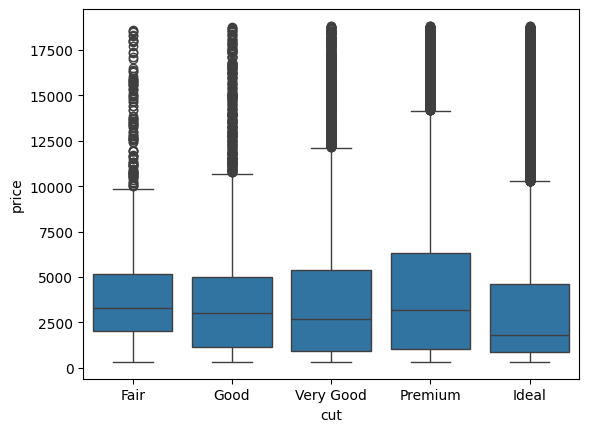

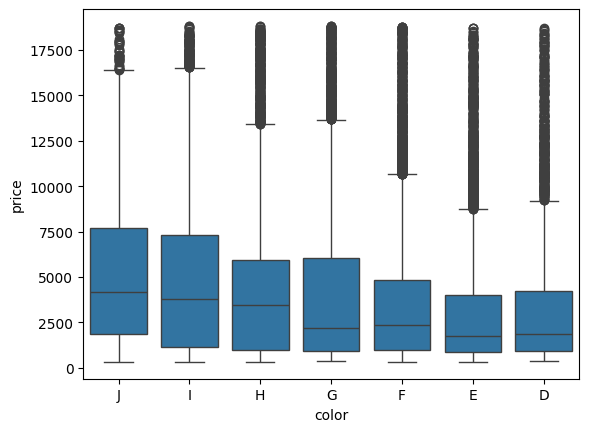

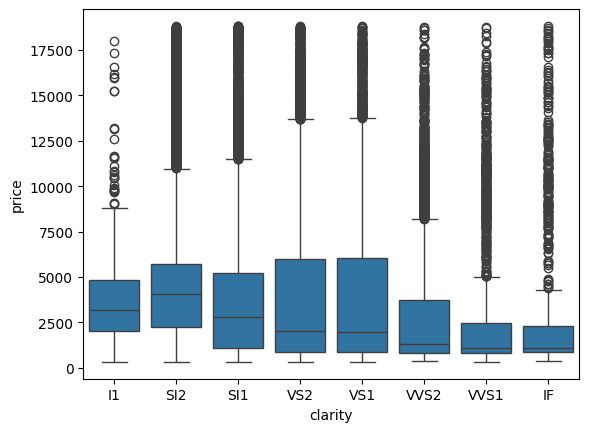

<Figure size 640x480 with 0 Axes>

In [138]:
# Converting to an ordered categorical pandas datatype to appear in order on the plot
p_copy['cut'] = pd.Categorical(p_copy['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
p_copy['color'] = pd.Categorical(p_copy['color'], categories=['J', 'I', 'H', 'G', 'F', 'E', 'D'], ordered=True)
p_copy['clarity'] = pd.Categorical(p_copy['clarity'], categories=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], ordered=True)


for var in categorical_variables:
    sns.boxplot(y='price',x=var,data=p_copy,orient='v')
    plt.show()
    plt.clf()

###### explain

In [139]:
# Size will be added to the prices dataset and then filtered to use either x,y, and z or size in the training phase
prices["size"] = prices["x"] * prices["y"] * prices["z"]
prices.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'size'],
      dtype='object')

In [140]:
from sklearn.preprocessing import OrdinalEncoder 
enc = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                                 ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                 ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
prices[['cut', 'color', 'clarity']] = enc.fit_transform(prices[['cut', 'color', 'clarity']]) # starts the lowest at 0 
prices[['cut', 'color', 'clarity']] += 1 # Adjusted to start at 1 


# Apply the same changes to the test_set 
test_set[['cut', 'color', 'clarity']] = enc.transform(test_set[['cut', 'color', 'clarity']])
test_set[['cut', 'color', 'clarity']] += 1 # Adjust to start at 1

In [141]:
prices.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1.06,5.0,2.0,2.0,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,1.51,4.0,4.0,6.0,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,0.32,5.0,5.0,4.0,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,0.53,5.0,4.0,4.0,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,0.70,4.0,3.0,6.0,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define features sets
X_dim = prices.drop(['size', 'price'], axis=1)
X_size = prices.drop(['x', 'y', 'z', 'price'], axis=1)
y = prices['price']

# Scaling
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_dimscaled = scaler1.fit_transform(X_dim)
X_sizescaled = scaler2.fit_transform(X_size)

# Splitting the data into training and testing sets for both feature sets
X_train_dim, X_test_dim, y_train, y_test = train_test_split(X_dimscaled, y, test_size=0.2, random_state=42)
X_train_size, X_test_size, _, _ = train_test_split(X_sizescaled, y, test_size=0.2, random_state=42)

# Initialize models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Function to evaluate models
def check_models(models, X_train, y_train, cross_val_folds=10):
    results = {}
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cross_val_folds)
        rmse = np.sqrt(-cv_scores)
        results[name] = rmse.mean()
        print(f"{name} RMSE: {rmse.mean()} ± {rmse.std()}")

# Evaluate models on the first feature set
print("Evaluating models on dimensions feature set:")
check_models(regression_models, X_train_dim, y_train)

# # Evaluate models on the second feature set
# print("Evaluating models on size feature set:")
# check_models(regression_models, X_train_size, y_train)

Evaluating models on dimensions feature set:
Linear Regression RMSE: 1214.3567930336037 ± 38.31671612701116
Decision Tree RMSE: 742.2333180123311 ± 34.09249729857418
Random Forest RMSE: 545.4405292423795 ± 21.145920009685092
Evaluating models on size feature set:
Linear Regression RMSE: 1250.047060126634 ± 60.91014947817094
Decision Tree RMSE: 742.1741977936205 ± 26.52483476613568
Random Forest RMSE: 558.1177080969758 ± 18.586281608180933
